# Customer Segmentation

Customer segmentation is basically finding key factors that can be used to divide customers into groups that can be targeted for marketing. This entails use of features such as <b>age, gender, income, work, work experience and spending habbits</b> to create different groups.

The goal of segmenting customers is to know how they are related and their value in the business. This therefore helps companies in sending special offers to their valued customers and encourage them to buy products or make some kind of business with them.

Customer segmentation is also useful in improvement of customer service and customer retention.

In this project, a machine learning model is created that segments customers based on certain features that can help businesses improve their marketing activities by targeting the right groups of their customers for certain offers, retaining them and attracting more.

This model is trained on an <b> Unsupervised Clustering Algorithm (KMeans Clustering)</b> to divide and group customers into similar groups. 

<b> Data </b>

The dataset used in this project contains the following features.

. CustomerID

. Age

. Gender

. Annual Income ($)

. Profession

. Work experience

. Family size

. Spending Score (1-100)

The above features are analyzed and the most useful ones are used for clustering.

In [16]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
# from sklearn.svm import SVR
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import LabelEncoder

In [2]:
# load the dataset
dataset = pd.read_csv("Customers.csv")
df = pd.DataFrame(dataset)
df

,CustomerID,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,Spending Score (1-100)
0,1,Male,19,15000,Healthcare,1,4,39
1,2,Male,21,35000,Engineer,3,3,81
2,3,Female,20,86000,Engineer,1,1,6
3,4,Female,23,59000,Lawyer,0,2,77
4,5,Female,31,38000,Entertainment,2,6,40
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,Artist,8,7,40
1996,1997,Female,91,73158,Doctor,7,7,32
1997,1998,Male,87,90961,Healthcare,9,2,14
1998,1999,Male,77,182109,Executive,7,2,4


## Exploratory Data Analysis 

In [4]:
# check the shapes of the rows and columns and the dataset's head values
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1], "\n")
print("Subset of the dataset: \n", df.head(), "\n")

Rows:  2000
Columns:  8 

Subset of the dataset: 
    CustomerID  Gender  Age  Annual Income ($)     Profession  Work Experience  \
0           1    Male   19              15000     Healthcare                1   
1           2    Male   21              35000       Engineer                3   
2           3  Female   20              86000       Engineer                1   
3           4  Female   23              59000         Lawyer                0   
4           5  Female   31              38000  Entertainment                2   

   Family Size  Spending Score (1-100)  
0            4                      39  
1            3                      81  
2            1                       6  
3            2                      77  
4            6                      40   



In [5]:
# sort values based on Annual Income
df.sort_values("Annual Income ($)", inplace=True)
df

,CustomerID,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,Spending Score (1-100)
169,170,Male,32,0,Artist,2,2,63
246,247,Male,23,0,Doctor,1,3,96
272,273,Female,96,1000,Entertainment,0,3,76
113,114,Male,19,2000,Artist,1,1,46
96,97,Female,47,2000,Artist,0,1,47
...,...,...,...,...,...,...,...,...
638,639,Female,59,189672,Doctor,0,7,8
1576,1577,Female,16,189689,Healthcare,8,5,37
1825,1826,Male,7,189709,Artist,6,6,18
1257,1258,Male,60,189945,Engineer,0,5,20


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Profession                object
Work Experience            int64
Family Size                int64
Spending Score (1-100)     int64
dtype: object

In [7]:
# dataset's stats information
df.describe()

,CustomerID,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,4.102500,3.768500,50.962500
std,577.494589,28.429747,45739.536688,3.922204,1.970749,27.934661
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,500.750000,25.000000,74572.000000,1.000000,2.000000,28.000000
50%,1000.500000,48.000000,110045.000000,3.000000,4.000000,50.000000
75%,1500.250000,73.000000,149092.750000,7.000000,5.000000,75.000000
max,2000.000000,99.000000,189974.000000,17.000000,9.000000,100.000000


In [8]:
# dataset's information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 169 to 569
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
 7   Spending Score (1-100)  2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 140.6+ KB


In [9]:
# check for any null values
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Profession                35
Work Experience            0
Family Size                0
Spending Score (1-100)     0
dtype: int64

In [10]:
# from the above analysis, I can see some missing values from Profession column
# check for the individual Profession's value count
df["Profession"].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

In [11]:
# filter out a subset where "Profession" is NaN
df[df["Profession"].isna()]

,CustomerID,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,Spending Score (1-100)
237,238,Male,95,36000,NaN,0,4,35
1788,1789,Female,58,51416,NaN,7,5,46
440,441,Female,0,57373,NaN,0,7,29
1932,1933,Female,23,59905,NaN,7,5,79
1009,1010,Male,69,61637,NaN,0,5,67
219,220,Female,59,76000,NaN,9,1,61
1067,1068,Female,30,78821,NaN,1,4,46
927,928,Male,25,81367,NaN,0,3,87
118,119,Female,51,84000,NaN,2,7,43
1334,1335,Male,42,94844,NaN,7,6,64


## Saving Figures as png Images
Below is an extra code that will save plot figures as png image files

In [12]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [13]:
# check for duplicates
print(df.duplicated().any())
duplicated_data = df.duplicated()
print("Number of duplicated data: ", duplicated_data[duplicated_data == True].size)

False
Number of duplicated data:  0


In [14]:
# drop the customer ID column, it does not seem to be that relevant
df.drop(["CustomerID"], axis=1, inplace=True)
df

,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,Spending Score (1-100)
169,Male,32,0,Artist,2,2,63
246,Male,23,0,Doctor,1,3,96
272,Female,96,1000,Entertainment,0,3,76
113,Male,19,2000,Artist,1,1,46
96,Female,47,2000,Artist,0,1,47
...,...,...,...,...,...,...,...
638,Female,59,189672,Doctor,0,7,8
1576,Female,16,189689,Healthcare,8,5,37
1825,Male,7,189709,Artist,6,6,18
1257,Male,60,189945,Engineer,0,5,20


#### Data Visualization

C:\Users\ojare\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ojare\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ojare\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

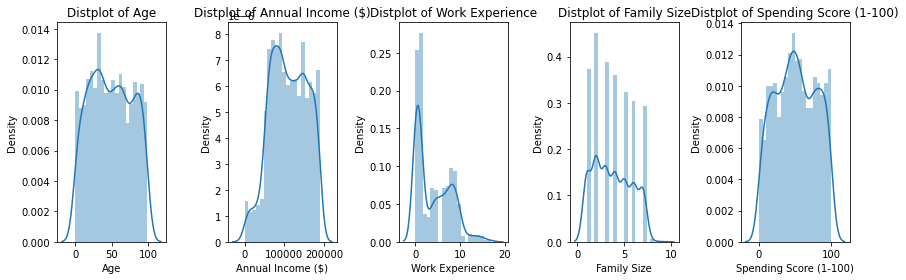

In [19]:
plt.figure(1, figsize=(12,4))
n = 0
for x in ["Age", "Annual Income ($)", "Work Experience", "Family Size", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1,5,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title("Distplot of {}".format(x))
save_fig("distplot")
plt.show()

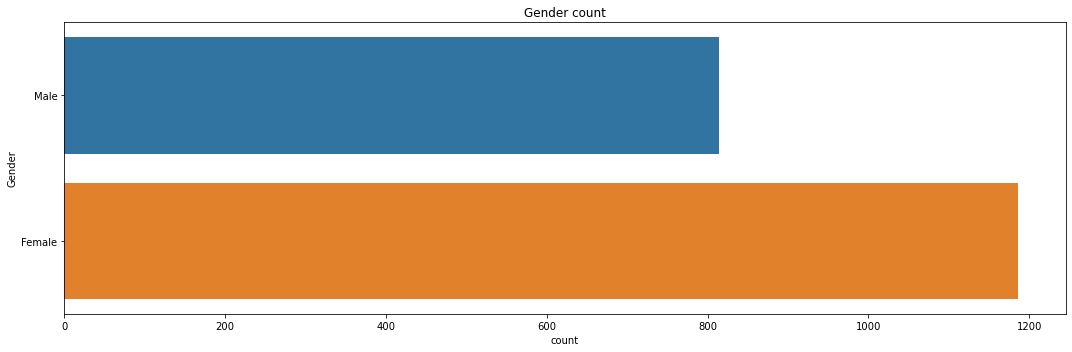

In [20]:
# gender count
plt.figure(figsize=(15,5))
sns.countplot(y="Gender", data = df)
plt.title("Gender count")
save_fig("gender-count")

## Data Cleaning

In [62]:
# fill the NaN values in Profession column with the most common values in that common
df["Profession"].fillna("Artist", inplace=True)

In [63]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Profession                0
Work Experience           0
Family Size               0
Spending Score (1-100)    0
dtype: int64

In [67]:
# encoding categorical values
pre_y = df["Spending Score (1-100)"] # intial assignment of y values
pre_X = df.drop("Spending Score (1-100)", axis=1) # intial assigment x values
dm_X = pd.get_dummies(pre_X) # dummy variables of x for onehotencoding

### Splitting the Dataset

In [71]:
X = dm_X
y = pre_y

In [72]:
print(X)
print(y)

      CustomerID  Age  Annual Income ($)  Work Experience  Family Size  \
169          170   32                  0                2            2   
246          247   23                  0                1            3   
272          273   96               1000                0            3   
113          114   19               2000                1            1   
96            97   47               2000                0            1   
...          ...  ...                ...              ...          ...   
638          639   59             189672                0            7   
1576        1577   16             189689                8            5   
1825        1826    7             189709                6            6   
1257        1258   60             189945                0            5   
569          570   91             189974                8            1   

      Gender_Female  Gender_Male  Profession_Artist  Profession_Doctor  \
169               0            1     